## Tensorflow for drift diffusion

tensor for the transition
vector for the state 



In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tf.reset_default_graph()

In [11]:
dt = 1.
dx = 1.
N = 100
M = 1000
u_init = tf.Variable(np.zeros([N, 1], dtype=np.float32))

In [12]:
# define the transition matrix 
m = np.random.rand(N, N)
T = tf.constant(m)

In [13]:
def transition_prob(x1, x2, dt, mu=.1, sigma=1.): 
    return 1 / (np.sqrt(2 * np.pi * dt * sigma ** 2)) * np.exp(-(x1 - x2 - mu * dt) ** 2 / (2 * sigma ** 2 * dt))

x, y = np.meshgrid(np.arange(0, N, dx), np.arange(0, N, dx))
m = transition_prob(x, y, dt)

In [14]:
state_mat = np.zeros((N, M))

In [15]:
sess = tf.InteractiveSession()

In [16]:
# state vector 
u_init = np.zeros(N)
u_init[int(N / 2)] = 1.
idx = tf.placeholder(tf.int64)

U = tf.Variable(u_init)

U_ = tf.tensordot(U, m, axes=1)
#indices = tf.constant(np.arange(1, N))
step = tf.group(U.assign(U_))


tf.summary.scalar("PX", U[50])
summary_op = tf.summary.merge_all()

# Initialize state to initial conditions
tf.global_variables_initializer().run()

summary_writer = tf.summary.FileWriter('logs', sess.graph) 

In [18]:
# Run 1000 steps of PDE
for i in range(M):
    state_mat[:, i] = U.eval()
    sess.run(step,{idx: i})
    summary = sess.run(summary_op)
    summary_writer.add_summary(summary,i)
    

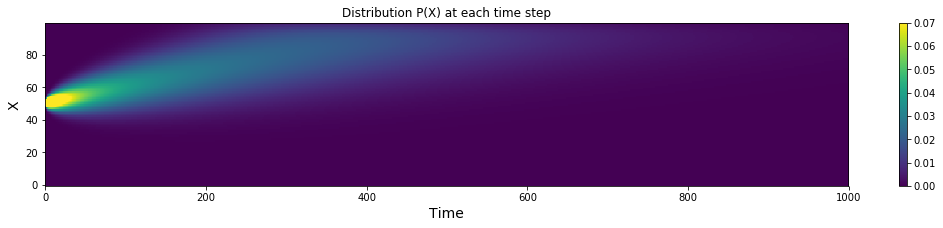

In [19]:
plt.figure(figsize = (18,3))
im =plt.imshow(state_mat, origin='lower', aspect='auto')
plt.colorbar()
im.set_clim(vmin=0,vmax=0.07)
plt.xlabel('Time', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.title('Distribution P(X) at each time step');

In [20]:
summary_writer.close()